<a href="https://colab.research.google.com/github/Whaleman0423/class_no.4_paper/blob/main/%E8%9D%A6%E4%B8%83%E5%85%AB%E4%BA%82%E5%90%88%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import cv2
import numpy as np


In [46]:
import cv2
from google.colab.patches import cv2_imshow

In [47]:
def resize_img(img, scale_percent=25):

    width = int(img.shape[1] * scale_percent / 100) # 縮放後圖片寬度
    height = int(img.shape[0] * scale_percent / 100) # 縮放後圖片高度
    dim = (width, height) # 圖片形狀 
    resize_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)  

    return resize_img

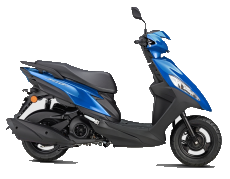

In [48]:
img2 = resize_img(cv2.imread("/content/1636551219600.jpg"))

copyIma = img2.copy()
h, w = img2.shape[:2]
mask = np.zeros([h+2, w+2], np.uint8)
cv2.floodFill(copyIma, mask, (30, 30), (255, 255, 255), (100, 100, 100), (50, 50, 50), cv2.FLOODFILL_FIXED_RANGE)  
cv2_imshow(copyIma)

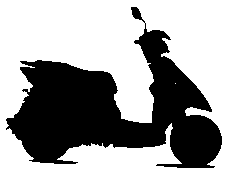

In [49]:
img2gray = cv2.cvtColor(copyIma,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY)
cv2_imshow(mask)


Use mask to crop origin image1:


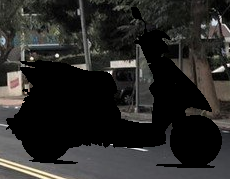

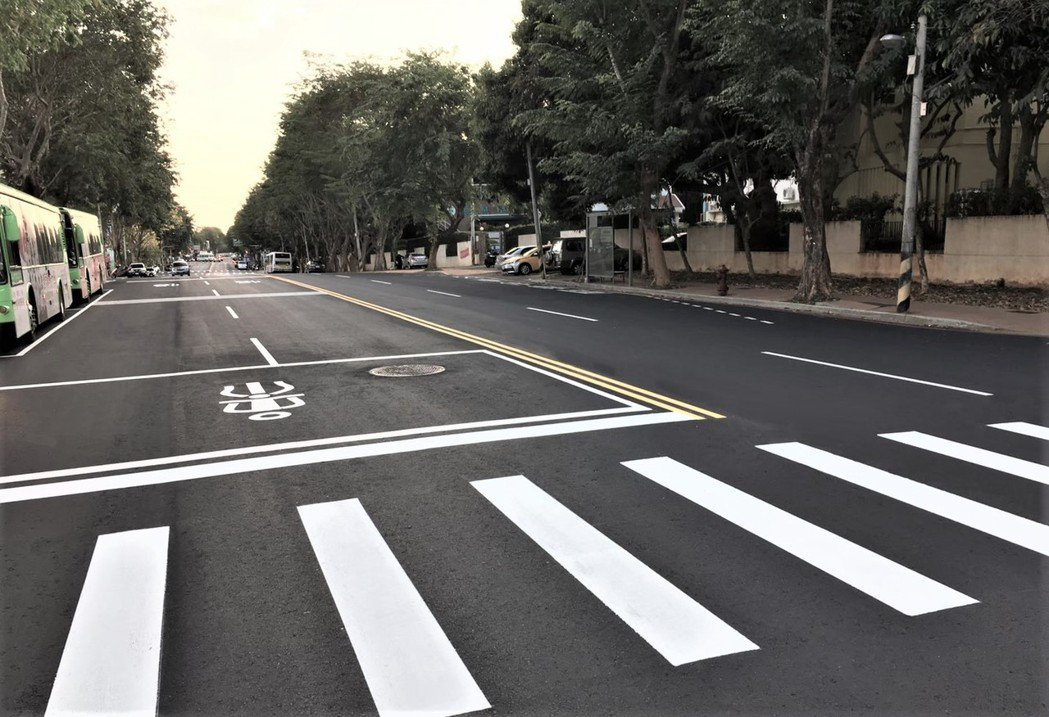

In [50]:
img1 = cv2.imread("/content/163167407147995_P13858714.jpg")
rows, cols, channels = img2.shape
x = 450 
y = 170
roi = img1[y:y+rows, x:x+cols]

print("Use mask to crop origin image1:")
img1_bg = cv2.bitwise_and(roi, roi, mask = mask)
cv2_imshow(img1_bg)
cv2_imshow(img1)


In [51]:
mask_inv = cv2.bitwise_not(mask)
img2_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)

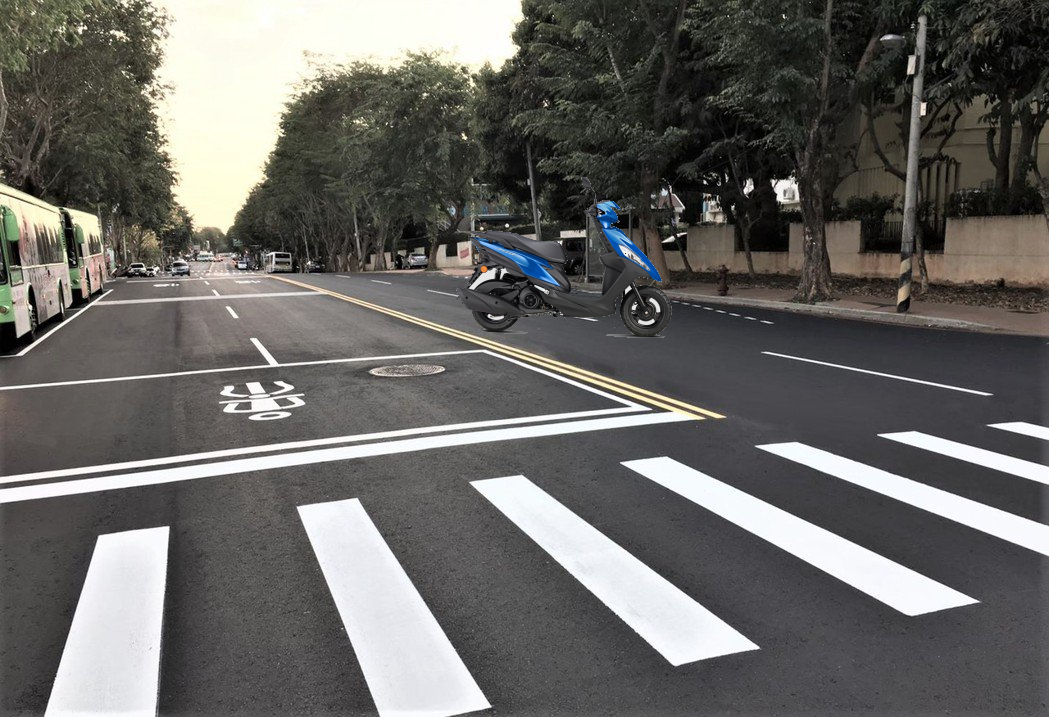

In [53]:
dst = cv2.add(img1_bg,img2_fg)
img1[y:y+rows, x:x+cols] = dst
cv2_imshow(img1)
